In [39]:
import pandas as pd

In [40]:
data = pd.read_csv('https://raw.githubusercontent.com/DataThinkers/Datasets/main/DS/insurance.csv')

In [41]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [43]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [44]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [45]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [46]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [47]:
data['smoker']=data['smoker'].map({"yes":1,"no":0})

In [48]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [49]:
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [50]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [51]:
X = data.drop(['charges'],axis=1)

In [52]:
y = data['charges']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [57]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)


In [58]:
df1=pd.DataFrame({"Actual":y_test,"LR":y_pred1,"SVM":y_pred2,"RF":y_pred3,"GR":y_pred4})

In [59]:
df1

,Actual,LR,SVM,RF,GR
764,9095.06825,8924.407244,9548.261584,9392.025044,11001.128629
887,5272.17580,7116.295018,9492.515425,5241.547074,5840.174656
890,29330.98315,36909.013521,9648.758701,28388.212271,28001.980112
1293,9301.89355,9507.874691,9555.044136,10057.999439,9745.291602
259,33750.29180,27013.350008,9420.421978,34393.741026,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47261.292284,45431.423211
575,12222.89830,11814.555568,9625.431547,12534.360985,12465.025294
535,6067.12675,7638.107736,9504.168517,6435.409888,6974.336525
543,63770.42801,40959.081722,9605.004594,46577.250064,47862.047791


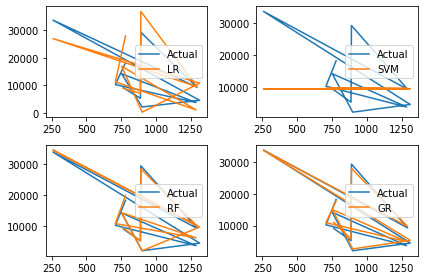

In [60]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["LR"].iloc[0:11],label="LR")
plt.legend()

plt.subplot(222)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["SVM"].iloc[0:11],label="SVM")
plt.legend()
plt.subplot(223)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["RF"].iloc[0:11],label="RF")
plt.legend()
plt.subplot(224)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["GR"].iloc[0:11],label="GR")
plt.tight_layout()
plt.legend()

In [61]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [62]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8628268901361492 0.8779936181637191


In [63]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [64]:
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2566.049644082495 2447.1671587151354


In [65]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [66]:
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [67]:
new_pred=gr.predict(df)

In [68]:
print("Insurance Cost",new_pred)

Insurance Cost [44757.24853851]


In [69]:
import joblib

In [70]:
joblib.dump(gr,"model_joblib_test")

['model_joblib_test']

In [71]:
model=joblib.load("model_joblib_test")

In [72]:
model.predict([[40,1,40.3,4,1,2]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([44757.24853851])

In [73]:
from tkinter import *

In [74]:
import joblib

In [75]:
#Customized Self


def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_test')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Insurance Cost").grid(row=7,column=1)
    Label(master, text=result).grid(row=8,column=1)


master =Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text = "Insurance Cost Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your Age").grid(row=1)
Label(master,text = "Male Or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()